In [1]:
import warnings
warnings.simplefilter("ignore")

# Statistics in Python: an introduction

In part adapted from: 
* Gaël Varoquaux [Scipy Lecture](https://scipy-lectures.org/packages/statistics/index.html#linear-models-multiple-factors-and-analysis-of-variance)
* The fMRI course developed by M. Brett and myself
* Many other resources


## Requirements
1. Standard scientific Python environment (numpy, scipy, matplotlib)
2. Pandas
3. [Statsmodels](https://www.statsmodels.org/stable/index.html)
4. [Seaborn](https://seaborn.pydata.org/)

**Disclaimer: Gender questions**

   Some of the examples of this tutorial are chosen around gender 
    questions. The reason is that on such questions controlling the truth
    of a claim actually matters to many people. 


## What this will not cover

* **Bayesian statistics in Python**:

    This chapter does not cover tools for Bayesian statistics.  
    Of particular interest for Bayesian modelling is 
    [PyMC](http://pymc-devs.github.io/pymc),  
    which implements a probabilistic programming language in Python.

* **Permutation testing** (see sklearn)

* **Read a statistics book**:
   The [Think stats](http://greenteapress.com/wp/think-stats-2e>)  
   book is available as free PDF or in print and is a great 
   introduction to statistics.

Data representation and interaction
====================================

Data as a table
---------------------

The setting that we consider for statistical analysis is that of multiple
*observations* or *samples* described by a set of different *attributes*
or *features*. The data can than be seen as a 2D table, or matrix, with
columns giving the different attributes of the data, and rows the
observations. For instance, the data contained in
[This csv file](https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/packages/statistics/examples/brain_size.csv)


The data in this .csv file looks like:
```
"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
```

## The pandas data-frame


We will store and manipulate this data in a
    `pandas.DataFrame`, from the [pandas](http://pandas.pydata.org) module. It is the Python equivalent of
    the spreadsheet table. It is different from a 2D ``numpy`` array as it
    has named columns, can contain a mixture of different data types by
    column, and has elaborate selection and pivotal mechanisms.


### Creating dataframes: reading data files or converting arrays



In [2]:
import pandas

csvfile = ('https://raw.githubusercontent.com/scipy-lectures/'
          'scipy-lecture-notes/master/packages/statistics/examples/brain_size.csv')

data = pandas.read_csv(csvfile, sep=';', index_col=0)

data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [3]:
print('What type is data ? : ', type(data))
print("It stores values in a numpy array:", type(data.values))
data.values[:5]

What type is data ? :  <class 'pandas.core.frame.DataFrame'>
It stores values in a numpy array: <class 'numpy.ndarray'>


array([['Female', 133, 132, 124, '118', '64.5', 816932],
       ['Male', 140, 150, 124, '.', '72.5', 1001121],
       ['Male', 139, 123, 150, '143', '73.3', 1038437],
       ['Male', 133, 129, 128, '172', '68.8', 965353],
       ['Female', 137, 132, 134, '147', '65.0', 951545]], dtype=object)

### warning: Missing values


The weight of the second individual is missing in the CSV file. In this
  particular file, missing values are represented by "`.`". If we don't specify
  the missing value (NA = not available) marker, pandas will not recognize this
  and we will not be able to do statistical analysis.


In [4]:
data = pandas.read_csv(csvfile, sep=';', na_values=".")
data.head(3) #.dropna()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437


## Creating from arrays

A `pandas.DataFrame` can also be seen as a dictionary of 1D 'series', eg arrays or lists. If we have 3
``numpy`` arrays:

In [5]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

# We can expose them as a :class:`pandas.DataFrame`::
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}).head(4)

# Question : what is the first argument ? 

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509


## Manipulating data


In [6]:
print('data.shape: ', data.shape)
print('data.columns: ',data.columns)  # It has columns
print('\nFemale VIQ mean: ', data[data['Gender'] == 'Female']['VIQ'].mean())

data.describe()

data.shape:  (40, 8)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

Female VIQ mean:  109.45


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [7]:
# Question: Will we get the same results with : 
# `data.dropna().describe()` ?

In [8]:
# "Group by"
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [9]:
type(groupby_gender)

pandas.core.groupby.groupby.DataFrameGroupBy

In [10]:
data.loc[data['Gender'] == 'Female', 'VIQ'] += 1

In [11]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

data['VIQ'] += 1

# Question : what if we look at the groupby_gender object ? 

('Female', 110.45)
('Male', 115.25)


In [12]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 111.45)
('Male', 116.25)


* What is the mean value for VIQ for the full population?
* How many males/females were included in this study?

  **Hint** use 'tab completion' to find out the methods that can be
  called, instead of 'mean' in the above example.

* What is the average value of MRI counts expressed in log units, for
  males and females?


## Plotting data


In [13]:
from pandas import plotting as pdplt
pdplt.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]);

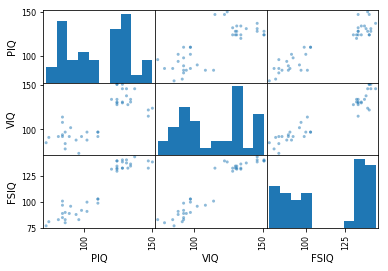

In [14]:
pdplt.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

The IQ metrics are bimodal, as if there are 2 sub-populations.

# Hypothesis testing: comparing two groups


For simple statistical tests:

https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

we will use the `scipy.stats` sub-module of [scipy](http://docs.scipy.org/doc/)



In [15]:
from scipy import stats
from scipy import stats as sst

Cohen's d effect size : 

$\hspace{3cm} d = \frac{\mu}{\sigma}$

$\mu$ the non normalized effect size, $\sigma$ the standard deviation of the **data**

Author report: APOE effect on hippocampal volume has a p value of 6.6311e-10, n=733
What is the effect size of APOE on the hippocampal volume ?


In [16]:
# create a normal(0,1) variable 
n01 = sst.norm(0,1.)
# n01 = sst.t(df=733)

z = n01.isf(6.6311e-10)

#wat = n01.cdf(6.6311e-10)

d = n01.isf(6.6311e-10)/np.sqrt(733)
print("z = {:4.3f} d = {:4.3f}".format(z,d))

z = 6.064 d = 0.224


In [17]:
n01.rvs(size=(3,3))

array([[ 1.49595607,  0.30312633, -0.84135449],
       [ 0.17138256, -2.02285531, -1.56236516],
       [-0.53561298, -1.51091638,  1.39962506]])

[Text(0,0.5,'Frequency'), Text(0.5,0,'Uniform Distribution ')]

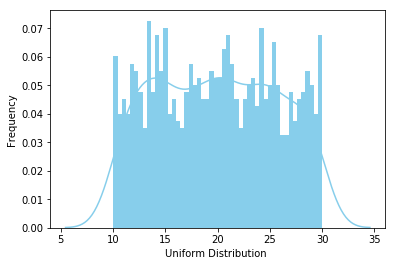

In [18]:
# scipy stats has a great number of distribution, all with pdf cdf, sf, isf, etc ...  
# but you can also sample from these: 
n, start, width = 1000, 10, 20
unif10_20 = sst.uniform(loc=start,scale=width)
data_uniform = unif10_20.rvs(size=(n,))

import seaborn as sns
ax = sns.distplot(data_uniform,
                  bins=50,
#                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

![title](stats-distrib.png)

## Student's t-test: the simplest statistical test


`scipy.stats.ttest_1samp` tests if the population mean of data is
likely to be equal to a given value (technically if observations are
drawn from a Gaussian distributions of given population mean). It returns
the [T statistic](https://en.wikipedia.org/wiki/Student%27s_t-test),
and the [p-value](https://en.wikipedia.org/wiki/P-value) (see the
function's help)

In [19]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.5643761507487, pvalue=7.3798528645483e-29)

### Definition of a p-value


Probability of observing a statistic equal to the one seen 
in the data, or one that is more extreme, when the null 
hypothesis is true


Requires:
* Knowledge of the null hypothesis
* Choice of a statistic
* Concept of repeating the whole study in the same way
    - Same study design
    - Same sampling scheme
    - Same definition of the statistic

### 2-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the  male and  
female populations were different. To test if this is  
significant, we do a 2-sample t-test with  

`scipy.stats.ttest_ind`



In [20]:
np.set_printoptions(precision=4) # he non !

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

#stats.ttest_ind?

Ttest_indResult(statistic=-0.6394064874434492, pvalue=0.5263946181763066)

### Paired tests: repeated measurements on the same individuals

PIQ, VIQ, and FSIQ give 3 measures of IQ.  
Let us test if FISQ and PIQ are significantly  
different. We can use a 2 sample test


{'Female': Int64Index([0, 4, 5, 6, 7, 10, 13, 14, 15, 16, 18, 22, 24, 26, 28, 29, 30, 34,
             35, 37],
            dtype='int64'),
 'Male': Int64Index([1, 2, 3, 8, 9, 11, 12, 17, 19, 20, 21, 23, 25, 27, 31, 32, 33, 36,
             38, 39],
            dtype='int64')}

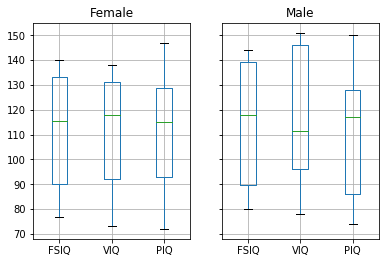

In [21]:
# Box plots of different columns for each gender
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
groupby_gender.groups

In [22]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

# Can you see a problem with this approach ?

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The problem with this approach is that it forgets that there are links between  
observations: FSIQ and PIQ are measured on the same individuals. Thus the  
variance due to inter-subject variability is confounding, and can be removed,  
using a "paired test", or ["repeated measures test"](https://en.wikipedia.org/wiki/Repeated_measures_design)  

In [23]:
# considering that FSIQ and PIQ come from the same participants:

stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [24]:
# This is equivalent to a 1-sample test on the difference:

stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

# stats.ttest_1samp?

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

T-tests assume Gaussian errors.  

We can use a [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) that relaxes this assumption:


In [25]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### Exercise

* Test the difference between weights in males and females.
* Use non parametric statistics to test the difference  
  between VIQ in males and females.

In [26]:
import pandas
from statsmodels.formula.api import ols

data = pandas.read_csv(csvfile, sep=';', na_values='.')

model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Thu, 14 May 2020   Prob (F-statistic):             0.0184
Time:                        00:01:31   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

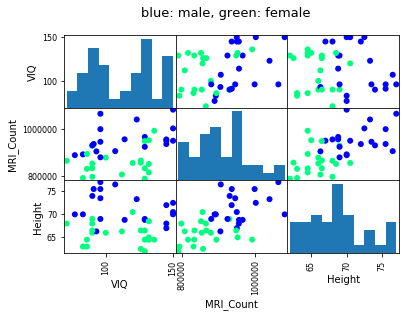

In [27]:
###############################################################################
# Here we plot a scatter matrix to get intuitions on our results.
# This goes beyond what was asked in the exercise

# This plotting is useful to get an intuitions on the relationships between
# our different variables

from pandas.tools import plotting
import matplotlib.pyplot as plt

# Fill in the missing values for Height for plotting
data['Height'].fillna(method='pad', inplace=True)

# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap
plotting.scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()

# Linear models, multiple factors, and analysis of variance

## "formulas" to specify statistical models in Python

### A simple linear regression


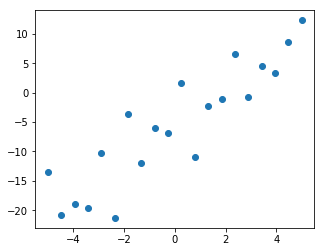

In [28]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Generate and show the data
x = np.linspace(-5, 5, 20)

# To get reproducible values, provide a seed value
np.random.seed(1)

y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')

In [29]:
#############################################################
# Multilinear regression model, calculating fit, P-values,
# confidence intervals etc.

# Convert the data into a Pandas DataFrame to use the formulas 
# framework in statsmodels
data = pandas.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 14 May 2020   Prob (F-statistic):           8.56e-08
Time:                        00:01:32   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [30]:
# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

#print('\nANOVA results')
print(anova_results)

            df       sum_sq      mean_sq          F        PR(>F)
x          1.0  1588.873443  1588.873443  74.029383  8.560649e-08
Residual  18.0   386.329330    21.462741        NaN           NaN


Statsmodels uses a statistical terminology: the `y` variable in
statsmodels is called 'endogenous' while the `x` variable is called
exogenous.  This is discussed in more detail in  
http://statsmodels.sourceforge.net/devel/endog_exog.html

To simplify, `y` (endogenous) is the value you are trying to predict,
while `x` (exogenous) represents the features you are using to make
the prediction.


Retrieve the estimated parameters from the model above. 


   **Hint**: use tab-completion to find the relevent attribute.


In [31]:
# model.model.exog

## Categorical variables: comparing groups or multiple categories


In [32]:
# remember, we modified "data" !
data = pandas.read_csv(csvfile, sep=';', na_values=".")

In [33]:
model = ols("VIQ ~ Gender + 1", data)
modelfit = model.fit()
print(modelfit.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 14 May 2020   Prob (F-statistic):              0.445
Time:                        00:01:32   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [34]:
model.exog_names

['Intercept', 'Gender[T.Male]']

**Forcing categorical**:

the 'Gender' is automatically detected as a
categorical variable, and thus each of its different values are
treated as different entities.

An integer column can be forced to be treated as categorical using:

    model = ols('VIQ ~ C(Gender)', data).fit()


**Intercept**:

We can remove the intercept using `- 1` in the formula,
or force the use of an intercept using `+ 1`.


By default, statsmodels treats a categorical variable with K possible
values as K-1 'dummy' boolean variables (the last level being
absorbed into the intercept term).  This is almost always a good
default choice - however, it is possible to specify different
encodings for categorical variables
(http://statsmodels.sourceforge.net/devel/contrasts.html).



**Link to t-tests between different FSIQ and PIQ**

In [35]:
# To compare different types of IQ, we need to create a "long-form"
# table, listing IQs, where the type of IQ is indicated by a
# categorical variable::

data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))

print(data_long)

#some_rows = (np.random.random_sample(data_long.shape[0]) < .15)
#print(data_long.loc[some_rows, 'type'])

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
5    99  fsiq
6   138  fsiq
7    92  fsiq
8    89  fsiq
9   133  fsiq
10  132  fsiq
11  141  fsiq
12  135  fsiq
13  140  fsiq
14   96  fsiq
15   83  fsiq
16  132  fsiq
17  100  fsiq
18  101  fsiq
19   80  fsiq
20   83  fsiq
21   97  fsiq
22  135  fsiq
23  139  fsiq
24   91  fsiq
25  141  fsiq
26   85  fsiq
27  103  fsiq
28   77  fsiq
29  130  fsiq
..  ...   ...
10  124   piq
11  128   piq
12  124   piq
13  147   piq
14   90   piq
15   96   piq
16  120   piq
17  102   piq
18   84   piq
19   86   piq
20   86   piq
21   84   piq
22  134   piq
23  128   piq
24  102   piq
25  131   piq
26   84   piq
27  110   piq
28   72   piq
29  124   piq
30  132   piq
31  137   piq
32  110   piq
33   86   piq
34   81   piq
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [36]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 14 May 2020   Prob (F-statistic):              0.643
Time:                        00:01:32   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [37]:
# same values 
stats.ttest_ind(data['PIQ'], data['FSIQ']) 

Ttest_indResult(statistic=-0.465637596380964, pvalue=0.6427725009414841)


 Going back to the brain size + IQ data, test if the VIQ of male and
 female are different after removing the effect of brain size, height
   and weight.
```

In [38]:
data = pandas.read_csv(csvfile, sep=';', na_values=".")
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [39]:
modelfit = ols("VIQ ~ Weight + Height + MRI_Count + Gender", data).fit()
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Thu, 14 May 2020   Prob (F-statistic):             0.0455
Time:                        00:01:32   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.885      0.068     -13.443     352.987
Gender[T.Male]    10.1579     10.891      0.933      0.358     -12.001      32.317
Weight            -0.1427      0.215     -0.665      0.511      -0.579       0.294
Height            -2.7337      1.410     -1.938      0.061      -5.603       0.136
MRI_Count          0.0002   6.48e-05      2.489      0.018    2.94e-05       0.000
==============================================================================
Omnibus:                        5.002   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                1.892
Skew:                          -0.066   Prob(JB):                        0.388
Kurtosis:                       1.915   Cond. No.                     2.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
modelfit = ols("VIQ ~ Weight + Height + MRI_Count*Gender - 1", data).fit()
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     2.166
Date:                Thu, 14 May 2020   Prob (F-statistic):             0.0827
Time:                        00:01:32   Log-Likelihood:                -166.92
No. Observations:                  38   AIC:                             345.8
Df Residuals:                      32   BIC:                             355.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Gender[Female]             198.4123    114.298      1.736      0.092     -34.405     431.230
Gender[Male]               157.0996    113.139      1.389      0.175     -73.358     387.557
Weight                      -0.1110      0.230     -0.482      0.633      -0.580       0.358
Height                      -2.8852      1.474     -1.957      0.059      -5.888       0.117
MRI_Count                    0.0001   9.18e-05      1.465      0.153   -5.25e-05       0.000
MRI_Count:Gender[T.Male]  5.637e-05      0.000      0.416      0.680      -0.000       0.000
==============================================================================
Omnibus:                        5.161   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                1.905
Skew:                          -0.037   Prob(JB):                        0.386
Kurtosis:                       1.906   Cond. No.                     4.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
print(modelfit.f_test([1, -1, 0, 0, 0, 0]))
print(modelfit.f_test([[0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0]]))  

<F test: F=array([[0.1105]]), p=0.7417740374529984, df_denom=32, df_num=1>
<F test: F=array([[3.2414]]), p=0.05225463463248599, df_denom=32, df_num=2>


In [42]:
#modelfit.model.exog

# Robust statistics with statsmodel

In [43]:
import statsmodels.api as sm
#data = sm.datasets.stackloss.load()
data = modelfit.model
huber_t = sm.RLM(data.endog, data.exog, M=sm.robust.norms.HuberT())
hub_results = huber_t.fit()
print(hub_results.params)
print(hub_results.bse)
print(hub_results.summary(yname='y', xname=data.exog_names))
#           xname=['var_{:d}'.format(i) for i in range(len(hub_results.params))]))

[ 1.9838e+02  1.5490e+02 -1.1201e-01 -2.8874e+00  1.3500e-04  5.8124e-05]
[1.2748e+02 1.2619e+02 2.5696e-01 1.6441e+00 1.0238e-04 1.5123e-04]
                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   38
Model:                            RLM   Df Residuals:                       32
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 14 May 2020                                         
Time:                        00:01:32                                         
No. Iterations:                    13                                         
                               coef    std err          z      P>|z|

In [44]:
nsample = 50
x1 = np.linspace(0, 20, nsample)
X = np.asarray([x1, (x1-5)**2]).T
X = sm.add_constant(X)
sig = 0.3   # smaller error variance makes OLS<->RLM contrast bigger
beta = [5, 0.5, -0.0]
y_true2 = np.dot(X, beta)
y2 = y_true2 + sig*1. * np.random.normal(size=nsample)
y2[[39,41,43,45,48]] -= 5   # add some outliers (10% of nsample

In [45]:
modelfit = sm.OLS(y2, X).fit()
print(modelfit.params)
print(modelfit.bse)
# print(modelfit.predict() - y2)

[ 5.05    0.5223 -0.0122]
[0.4415 0.0682 0.006 ]


In [46]:
modelfit_rlm = sm.RLM(y2, X).fit()
print(modelfit_rlm.params)
print(modelfit_rlm.bse)

[ 4.9833e+00  5.0795e-01 -1.9614e-03]
[0.1237 0.0191 0.0017]


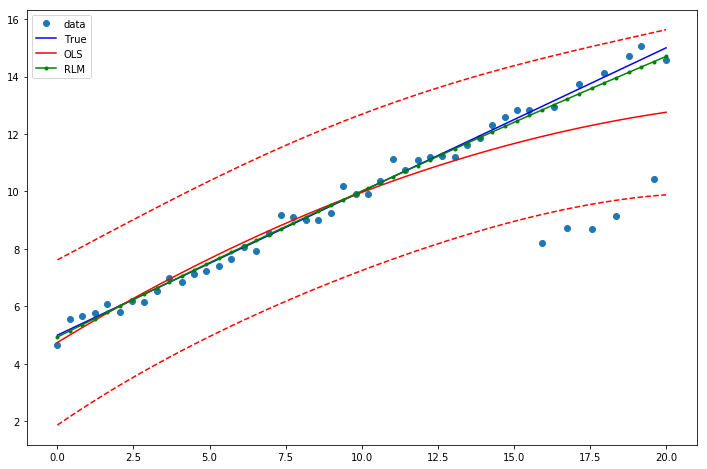

In [47]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(x1, y2, 'o',label="data")
ax.plot(x1, y_true2, 'b-', label="True")
predict_std, conf_lower, conf_upper = wls_prediction_std(modelfit)

ax.plot(x1, modelfit.fittedvalues, 'r-', label="OLS")
ax.plot(x1, conf_upper, 'r--')
ax.plot(x1, conf_lower, 'r--')
ax.plot(x1, modelfit_rlm.fittedvalues, 'g.-', label="RLM")
ax.legend(loc="best")

In [48]:
#wls_prediction_std?

$\newcommand{L}[1]{\| #1 \|}\newcommand{VL}[1]{\L{ \vec{#1} }}\newcommand{R}[1]{\operatorname{Re}\,(#1)}\newcommand{I}[1]{\operatorname{Im}\, (#1)}$

# Correlated regressors

Load and configure libraries:

In [49]:
from __future__ import print_function
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
# Make numpy print 4 significant digits for prettiness
np.set_printoptions(precision=4, suppress=True)
# Seed random number generator
np.random.seed(42)

In [50]:
%matplotlib inline

Imagine we have a TR (image) every 2 seconds, for 30 seconds. Here are
the times of the TR onsets, in seconds:

In [51]:
times = np.arange(0, 30, 2)
times

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

Now we make a function returning an HRF shape for an input vector of
times:

In [52]:
# Gamma distribution from scipy
from scipy.stats import gamma

In [53]:
def spm_hrf(times):
    """ Return values for SPM-like HRF at given times """
    # Make output vector
    values = np.zeros(len(times))
    # Only evaluate gamma above 0 (undefined at <= 0)
    valid_times = times[times > 0]
    # Gamma pdf for the peak
    peak_values = gamma.pdf(valid_times, 6)
    # Gamma pdf for the undershoot
    undershoot_values = gamma.pdf(valid_times, 12)
    # Combine them, put back into values vector
    values[times > 0] = peak_values - 0.35 * undershoot_values
    # Scale area under curve to 1
    return values / np.sum(values)

Sample the HRF at the given times (to simulate an event starting at time
0), and at times - 2 (simulating an event starting at time 2):

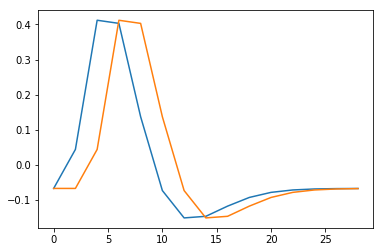

In [54]:
hrf1 = spm_hrf(times)
hrf2 = spm_hrf(times - 2) # An HRF with 2 seconds (one TR) delay
hrf1 = (hrf1 - hrf1.mean()) # Rescale and mean center
hrf2 = (hrf2 - hrf2.mean())
plt.plot(times, hrf1)
plt.plot(times, hrf2)

The Pearson correlation coefficient between the HRFs for the two events:

In [55]:
np.corrcoef(hrf1, hrf2)

array([[1.    , 0.7023],
       [0.7023, 1.    ]])

Make a signal that comes from the combination of the two HRFs:

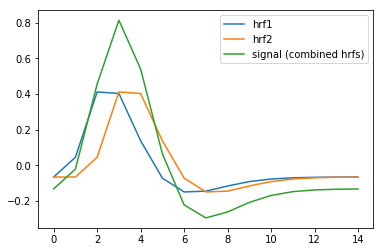

In [56]:
signal = hrf1 + hrf2
plt.plot(hrf1, label='hrf1')
plt.plot(hrf2, label='hrf2')
plt.plot(signal, label='signal (combined hrfs)')
plt.legend()

We’re going to make our simulated data from taking the signal (the two HRFs)
and adding some random noise:

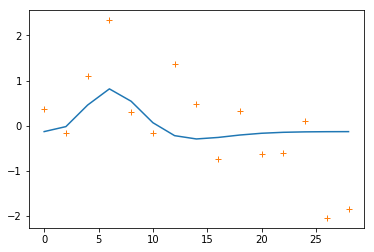

In [57]:
noise = np.random.normal(size=times.shape)
Y = signal + noise
plt.plot(times, signal)
plt.plot(times, Y, '+')

We are going to model this simulated signal in several different ways.  First,
we make a model that only has the first HRF as a regressor (plus a column of
ones to model the mean of the data):

Text(0.5,1,'Model with first HRF regressor only')

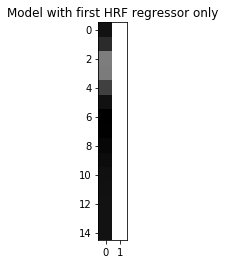

In [58]:
X_one = np.vstack((hrf1, np.ones_like(hrf1))).T
plt.imshow(X_one, interpolation='nearest', cmap='gray')
plt.title('Model with first HRF regressor only')

Next we make a model where we also include the second HRF as a regressor:

Text(0.5,1,'Model with both HRF regressors')

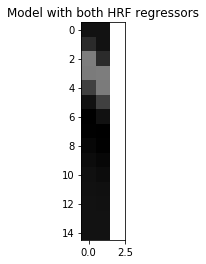

In [59]:
X_both = np.vstack((hrf1, hrf2, np.ones_like(hrf1))).T
plt.imshow(X_both, interpolation='nearest', cmap='gray')
plt.title('Model with both HRF regressors')

Now we make a very large number of data vectors, each with the signal
(both HRFs) plus a different vector of noise.

In [60]:
T = len(times)
iters = 10000
# Make 10000 Y vectors (new noise for each colum)
noise_vectors = np.random.normal(size=(T, iters))
# add signal to make data vectors
Ys = noise_vectors + signal[:, np.newaxis]
Ys.shape

(15, 10000)

We first fit the model with only the first HRF regressor to every (signal +
noise) sample vector.

In [61]:
# Fit X_one to signals + noise
B_ones = npl.pinv(X_one).dot(Ys)

Next fit the model with both HRFs as regressors:

In [62]:
# Fit X_both to signals + noise
B_boths = npl.pinv(X_both).dot(Ys)

Remember that the students-t statistic is:

$$
t = \frac{c^T \hat\beta}{\sqrt{\mathrm{var}(c^T \hat\beta)}}
$$

which works out to:

$$
t = \frac{c^T \hat\beta}{\sqrt{\hat{\sigma}^2 c^T (X^T X)^+ c}}
$$

where $\hat{\sigma}^2$ is our estimate of variance in the residuals, and
$(X^T X)^+$ is the [pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) of
$X^T X$.

That’s the theory. So, what is the distribution of the estimates we get for
the first beta, in the single-HRF model?

1.4766940546937173


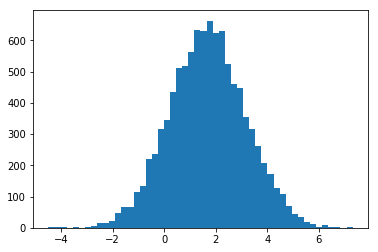

In [63]:
plt.hist(B_ones[0], bins=50)
print(np.std(B_ones[0]))

The standard deviation of the estimates is what we observe. Does this
match what we would predict from the t-statistic formula above?

In [64]:
C_one = np.array([1, 0])[:, None]  # column vector
sig_ones = np.sqrt(C_one.T.dot(npl.pinv(X_one.T.dot(X_one)).dot(C_one)))[0][0]
print(sig_ones)

1.4849715354084743


Notice that the mean of the estimates, is somewhere above one, even
though we only added 1 times the first HRF as the signal:

In [65]:
print(np.mean(B_ones[0]))
t_ones = B_ones/sig_ones
t_ones.mean()

1.6813401290558023


0.56673763507432

This is because the single first regresssor has to fit *both* the first HRF in
the signal, and as much as possible of the second HRF in the signal, because
there is nothing else in the model to fit the second HRF shape.

What estimates do we get for the first regressor, when we have both regressors
in the model?

0.9689335891975199 2.082741908931869


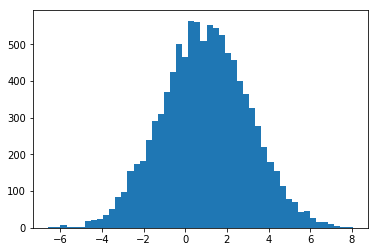

In [66]:
plt.hist(B_boths[0], bins=50)
print(np.mean(B_boths[0]), np.std(B_boths[0]))

Two things have happened now we added the second (correlated) hrf2 regressor.
First, the mean of the parameter for the hrf1 regressor has dropped to 1,
because hrf1 is no longer having to model the signal from the second HRF.
Second, the variability of the estimate has increased.  This is what the
bottom half of the t-statistic predicts:

In [67]:
C_both = np.array([1, 0, 0])[:, None]  # column vector
sig_both = np.sqrt(C_both.T.dot(npl.pinv(X_both.T.dot(X_both)).dot(C_both)))[0][0]

print(np.mean(B_boths[0]), np.std(B_boths[0]))

t_both_0 = B_boths[0]/sig_both
t_both_0.mean()

0.9689335891975199 2.082741908931869


0.46447485196343685

The estimate of the parameter for hrf2 has a mean of around 1, like the
parameter estimates for hrf1. This is what we expect because we have 1 x hrf1
and 1 x hrf2 in the signal. Not surprisingly, the hrf2 parameter estimate has
a similar variability to that for the hrf1 parameter estimate:

1.0145194467615963 2.080389328211071


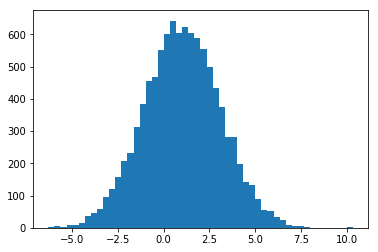

In [68]:
plt.hist(B_boths[1], bins=50)
print(np.mean(B_boths[1]), np.std(B_boths[1]))

In [69]:
C_both_1 = np.array([0, 1, 0])[:, None]  # column vector
np.sqrt(C_both_1.T.dot(npl.pinv(X_both.T.dot(X_both)).dot(C_both_1)))

array([[2.0865]])

The parameter estimates for hrf1 and hrf2 are anti-correlated:

array([[ 1.    , -0.7052],
       [-0.7052,  1.    ]])

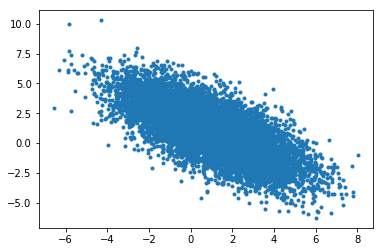

In [70]:
# Relationship of estimated parameter of hrf1 and hrf2
plt.plot(B_boths[0], B_boths[1], '.')
np.corrcoef(B_boths[0], B_boths[1])

## Orthogonalizing hrf2 with respect to hrf1

hrf2 is correlated with hrf1. That means that we can split up hrf2 into two
vectors, one being a multiple of hrf1, and the other being the remaining
unique contribution of hrf2. The sum of the two vectors is the original hrf2
regressor. Like this:

True

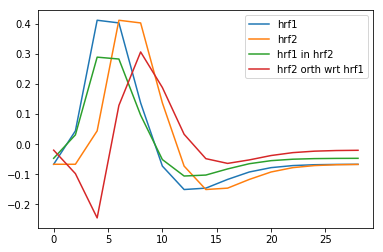

In [71]:
# Regress hrf2 against hrf1 to get best fit of hrf2 using just hrf1
y = hrf2
X = hrf1[:, np.newaxis]  # hrf1 as column vector
B_hrf1_in_hrf2 = npl.pinv(X).dot(y)  # scalar multiple of hrf1 to best fit hrf2
hrf1_in_hrf2 = X.dot(B_hrf1_in_hrf2)  # portion of hrf2 that can be explained by hrf1
unique_hrf2 = hrf2 - hrf1_in_hrf2  # portion of hrf2 that cannot be explained by hrf1
plt.plot(times, hrf1, label='hrf1')
plt.plot(times, hrf2, label='hrf2')
plt.plot(times, hrf1_in_hrf2, label='hrf1 in hrf2')
plt.plot(times, unique_hrf2, label='hrf2 orth wrt hrf1')
plt.legend()
# hrf1 part of hrf2, plus unique part, equals original hrf2
np.allclose(hrf2, hrf1_in_hrf2 + unique_hrf2)

How much of the first regressor did we find in the second regressor?

In [72]:
B_hrf1_in_hrf2

array([0.7022])

When we have the model with both hrf1 and hrf2, we are effectively multiplying
both parts of hrf2 by the same beta parameter, to fit the data. That is, we
are applying the same scaling to the part of hrf2 that is the same shape as
hrf1 and the part of hrf2 that cannot be formed from the hrf1 shape.

Now, what happens if we replace hrf2, by just the part of hrf2, that cannot be
explained by hrf1? Our second regressor is now hrf2 *orthogonalized with
respect to* hrf1:

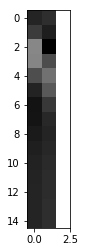

In [73]:
X_both_o = np.vstack((hrf1, unique_hrf2, np.ones_like(hrf1))).T
plt.imshow(X_both_o, interpolation='nearest', cmap='gray')

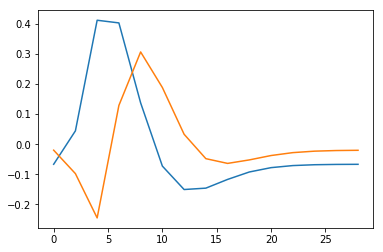

In [74]:
plt.plot(times, X_both_o[:,0], times, X_both_o[:,1])

What will happen when we fit this model?

1.6813401290558023 1.4766940546937173


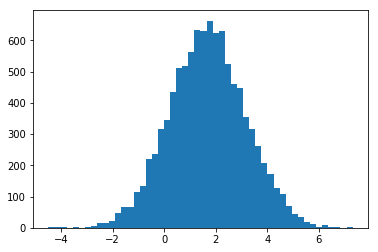

In [75]:
B_boths_o = npl.pinv(X_both_o).dot(Ys)
# Distribution of parameter for hrf1 in orth model
plt.hist(B_boths_o[0], bins=50)
print(np.mean(B_boths_o[0]), np.std(B_boths_o[0]))

In [76]:
# Predicted variance of hrf1 parameter is the same as for the
# model with hrf1 on its own
np.sqrt(C_both.T.dot(npl.pinv(X_both_o.T.dot(X_both_o)).dot(C_both)))

array([[1.485]])

The parameter for the hrf1 regressor has now returned to the same value and
variance as it had when hrf1 was the only regressor in the model (apart from
the mean). For the orthogonalized model, we removed the part of hrf2 that
could be explained by hrf1. Now, the amount of hrf1, that we could find in
hrf2, has been added back to the parameter for hrf1, in order to make the
fitted $\hat{y}$ values the same as for the model with both HRFs.

In [77]:
np.mean(B_boths[0, :]) + B_hrf1_in_hrf2

array([1.6711])

The hrf1 parameter in the orthogonalized model is the same as for the model
that only includes hrf1 - as if the orthogonalized hrf2 was not present. The
parameter for orthogonalized hrf2 is the same as the parameter for hrf2 in the
not-orthogonalized model. We still need the same amount of the *orthogonal
part* of the second regressor to explain the signal:

In [78]:
# Example parameters from the single model
B_ones[:,:5]

array([[ 2.5395, -1.7854,  0.1398,  1.6884,  4.5348],
       [-0.1606, -0.0069,  0.3315, -0.1837, -0.2644]])

In [79]:
# Example parameters from the non-orth model
B_boths[:,:5]

array([[ 2.0143, -2.4845, -2.5391, -0.9706,  4.9768],
       [ 0.7481,  0.9955,  3.815 ,  3.7866, -0.6295],
       [-0.1606, -0.0069,  0.3315, -0.1837, -0.2644]])

In [80]:
# Example parameters from the orth model
B_boths_o[:,:5]

array([[ 2.5395, -1.7854,  0.1398,  1.6884,  4.5348],
       [ 0.7481,  0.9955,  3.815 ,  3.7866, -0.6295],
       [-0.1606, -0.0069,  0.3315, -0.1837, -0.2644]])

True

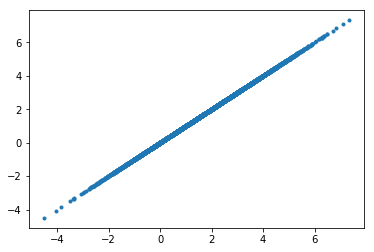

In [81]:
# The parameter for the hrf1 regressor in the orth model
# is the same as the parameter for the hrf1 regressor in the
# single regressor model
plt.plot(B_ones[0], B_boths_o[0], '.')
np.allclose(B_ones[0], B_boths_o[0])

True

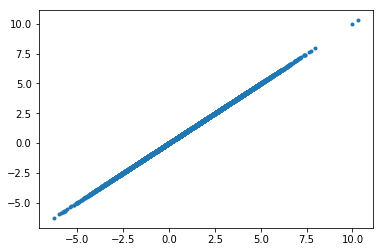

In [82]:
# The parameter for the orthogonalized hrf2 regressor is the same as the
# parameter for the non-orthogonalize hrf2 regressor in the
# non-orthogonalized model
plt.plot(B_boths[1], B_boths_o[1], '.')
np.allclose(B_boths[1], B_boths_o[1])

array([[1.    , 0.7128],
       [0.7128, 1.    ]])

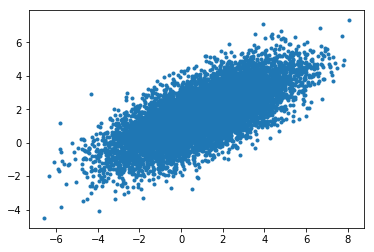

In [83]:
# The parameter for the hrf1 regressor in the non-orth model
# is correlated with the parameter for the hrf1 regressor
# in the orth model.
plt.plot(B_boths[0], B_boths_o[0], '.')
np.corrcoef(B_boths[0], B_boths_o[0])

array([[ 1.    , -0.0053],
       [-0.0053,  1.    ]])

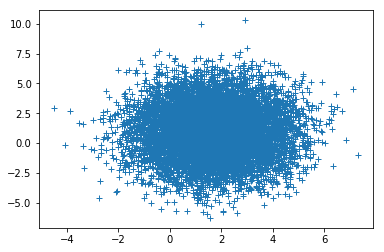

In [84]:
# Relationship of estimated parameters for hrf1 and orthogonalized hrf2
# (they should be independent)
plt.plot(B_boths_o[0], B_boths_o[1], '+')
np.corrcoef(B_boths_o[0], B_boths_o[1])